# Working with Derivatives 

### Introduction

At this point, we have spoken about how we can use the slope of a curve to help us with our machine learning algorithms.  For example, in gradient descent, we have seen something like the following.

<img src="https://storage.googleapis.com/curriculum-assets/nn-from-scratch/cost-curve-slopes.png" width="50%">

### Rates of change

Another way of thinking about the slope of a curve is as the rate of change of a function.  Knowing how to calculate the rate of change is important as a machine learning engineer, but it's applications extend beyond just machine learning to many areas of science.  

> The rate of change of a function is **the derivative** of that function.

Let's take a look at two functions, $f(x) = 3$ and $g(x) = 3x$ and consider their rate of change.

### Constant Functions

In [12]:
def f(x):
    return 3

> After defining the function above, we create a list of x values to eventually input into the function.

In [5]:
vals = [val/10 for val in list(range(0, 100))]
vals[:3]

[0.0, 0.1, 0.2]

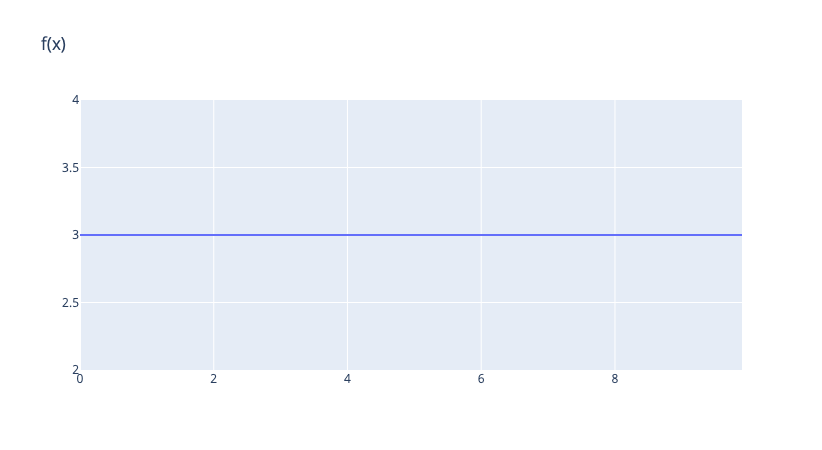

In [14]:
import plotly.graph_objects as go
f_of_x_scatter = go.Scatter(x=vals, y=[f(val) for val in vals], name = 'f(x) = 3')
go.Figure(f_of_x_scatter, layout = {'title': 'f(x)'})

The plot above represents $f(x)$ - let's imagine that the function, and therefore the graph, represents the number of feet someone travels over time.  So $x$ will represent the number of seconds that have past from our starting time, and $f(x)$ (or $y$) represents the distance that person has traveled.  

So looking at the graph above, at time 0, the individual is at point 3.  At time two, or $f(2)$ the individual is still at position 3.  And so on.  Our individual is not moving - he could be sleeping, or in a couch watching Netflix.  

What's the rate of change of this function?  0.  Our function does not change over time.

Because our function does not change, it's called a constant function.  The output is always the same.  And the derivative, or rate of change of constant function is 0.

### Linear Functions

On to the next function: $g(x) = 3x$.

> We change our function to $g(x)$ instead of $f(x)$ just to differentiate it from the one above. 

In [34]:
def g(x):
    return 3*x

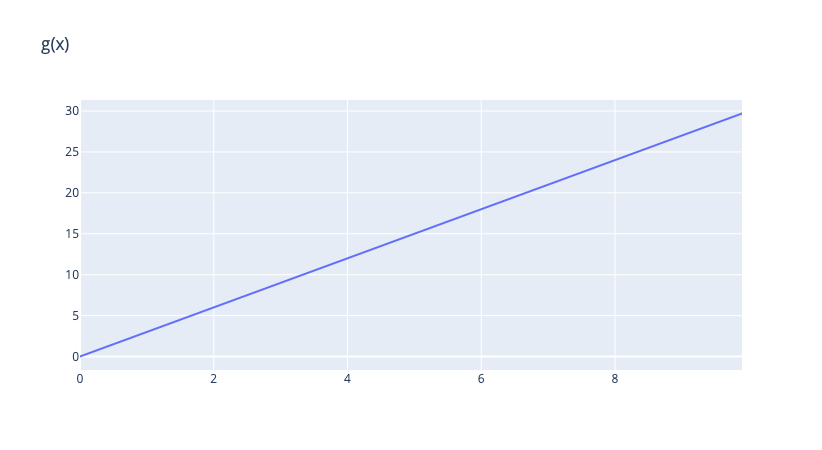

In [15]:
import plotly.graph_objects as go

g_of_x_scatter = go.Scatter(x=vals, y=[g(val) for val in vals], name = 'g(x) = 3x')
go.Figure(g_of_x, layout = {'title': 'g(x)'})

Ok, so this time our person is moving.  He is at position 0 at 0 seconds, then 6 at 2 seconds, and 12 at four seconds.  What's the rate of change?  

Well for every second, the change is 3.  To stick with our analogy, this time our person is jogging -- he's keeping a steady pace, and because of that his *rate of change* stays the same.

So while the person is moving, his speed, which is the change in distance over time, stays constant.  Therefore the rate of change, or in other words the derivative is constant.

The function above, $g(x) = 3x$ is called a linear function, because we can represent the function with a straight line.  And for linear functions, the rate of change is always constant -- just like our jogger's speed is constant.

### Developing a derivative formula

Ok, now it's time to use some mathematics to calculate the rate of change of a function.  This is our first attempt -- we'll develop it further later on:

> We begin by calculating our rate of change with rise over run.  Pick two points and the rate of change is the amount of change in output per rate of change in input.

Ok, let's try it with our two functions, $f(x) = 3$ and $g(x) = 3x$.

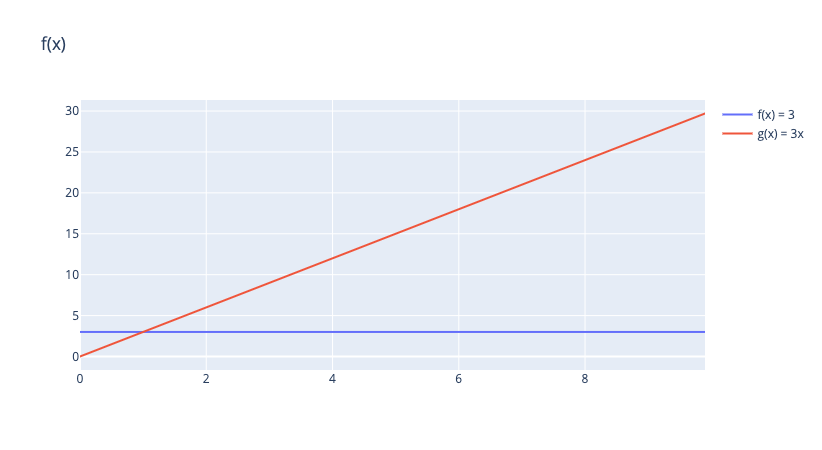

In [16]:
linear_funcs = go.Figure(data = [f_of_x_scatter, g_of_x_scatter], layout = {'title': 'f(x)'})
linear_funcs

Next we pick two sets of x and y values, say where $x = 0$, and where $x = 2$ and apply the following formula to calculate the derivative, or rate of change: 

$rate\_of\_change = \frac{\Delta y}{\Delta x} = \frac{y_1 - y_0}{x_1 - x_0}$

> The $\Delta y$, pronounced delta $y$, just means change in $y$, and is the difference in $y$ between two points.

Ok, let's try it with our two functions.  Our plan is to use the x and y values where $x = 0$, and where $x = 2$ on the formula above.

Let's start by using our formula for the rate of change above applied to $f(x) = 3 $.  
> We start by seeing the y values when $x = 0$, and $x = 3$.

In [7]:
y_1 = f(2) 
# 3
y_0 = f(0) 
# 3

Then we use our formula: $rate\_of\_change = \frac{y_1 - y_0}{x_1 - x_0}$

In [46]:
rate_of_change_of_f = (y_1 - y_0)/(2 - 0)
rate_of_change_of_f

0.0

So that's it.  The rate of change for $f(x) = 3$ is 0.  Which is what we saw in our plot of the function -- our person never get's off the couch, so the y value never changes, and the rate of change is 0.

Ok, next let's calculate the rate of change for the $g(x) = 3x$, which represented our jogger.

We start by calculating the values where $x = 0$ and $x = 3$:

In [9]:
def g(x):
    return 3*x

y_1 = g(2) # 6
y_0 = g(0) # 0

And then we plug in our values to the rate of change formula.

In [10]:
rate_of_change_of_g = (y_1 - y_0)/(2 - 0)
rate_of_change_of_g

3.0

Let's wrap this procedure in a function:

In [20]:
def rate_of_change(x_0, x_1, fn):
    return (fn(x_1) - fn(x_0))/(x_1 - x_0)

> Press shift + return on the cell above.

In [21]:
rate_of_change(0, 2, f)

0.0

> You can see that above we are using a callback function.  So above, we are passing through an unexecuted function `f` as an argument.  This allows us to calculate the rate of change for different functions simply by passing through a different function as an argument.  

> If you find this confusing, don't stress.  We will not be using callbacks again in these lessons.  The important point is that we are able to calculate the rate of change for different functions.

In [53]:
rate_of_change(0, 2, g)

3.0

### Non-linear functions

So far we have been calculating the rate of change with linear functions.  These are functions that can be represented as straight lines, like our functions $f(x) = 3$ or $g(x) = 3x$.

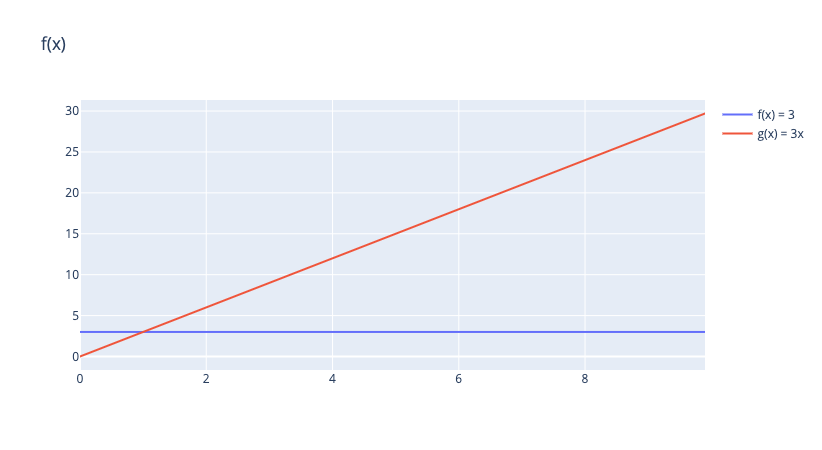

In [17]:
linear_funcs

Now let's move to another function: $h(x) = x^2$.  

In [48]:
def h(x):
    return x**2

As we can see, if we graph the outputs of this function, our function is non-linear. 

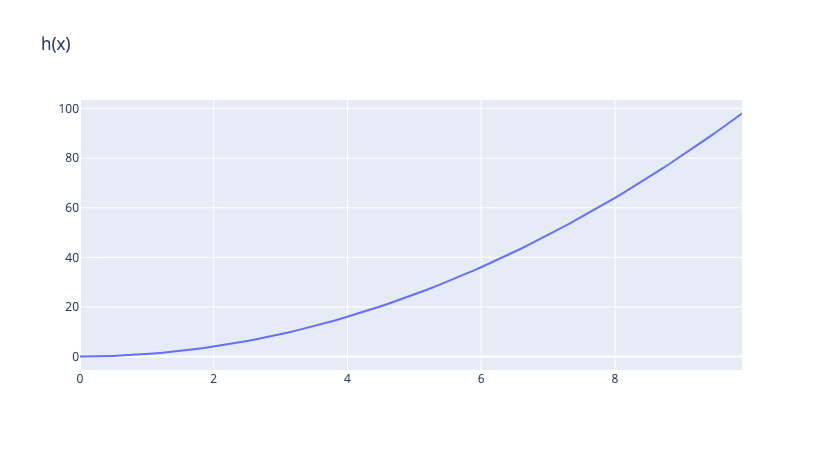

In [49]:
g_of_x = go.Scatter(x=vals, y=[h(val) for val in vals], name = 'h(x) = x^2')
go.Figure(g_of_x, layout = {'title': 'h(x)'})

Calculating the rate of change for a non-linear function is more complicated.

This time, if we try to use our old rate of change formula, you will see that we will get different answers depending on our values of x that we choose.  

For example the change in y  per  a change in x in the graph above appears a lot smaller at point $x = .5$ than where $x = 8$.  And in fact it is.

In [22]:
def h(x):
    return x**2

# rate of change from 0 to 2
rate_of_change(0, 2, h)

2.0

In [23]:
# rate of change from 8 to 10
rate_of_change(8, 10, h)

18.0

There are a couple of ways that this differs from our linear functions.

1. The rate of change differs for different $x$ values

Unlike with linear functions, our function's rate of change is not constant.  Going back to our distance example, here our runner is sprinting.  He travels a distance of 4 in the first two seconds, and then travels 12 in the next two seconds.  So if we were to ask for the rate of change of our runner, it *depends* on which second we look at.  More generally, our rate of change depends on $x$.

2. The rate of change differs depending on the *amount of the change in x*

Take a look at the following.

In [24]:
rate_of_change(8, 10, h)
# 18
rate_of_change(8, 9, h)
# 17.0

17.0

As we see above, for non-linear functions, our calculations for the rate of change will depend on the amount of *change* in $x$.  So even though we start at $x = 8$ each time, we get calculate different values for our rate of change depending on the size of our $\Delta x$ -- that is, the difference between our first and second $x$ values.

In [25]:
rate_of_change(8, 8.1, h)
# 16.10000000000005

16.10000000000005

Going back to our runner example, the reason this is occurs is because our calculation is supposed to calculate someone's speed *at exactly 8 seconds*.  But we do so by looking at how far he travelled *between seconds 8 and 10*.  And because during those seconds his speed changed, this affects our calculation.

To protect against this, we want the instantaneous rate of change.  We want to calculate someone's speed at precisely 8 seconds, or 0 seconds, etc.  But take a look at the code below, it looks like we can find this.

In [62]:
rate_of_change(8, 8.1, h)
# 16.10

rate_of_change(8, 8.01, h)
# 16.01

16.010000000000332

As we see above, our rate of change actually does emerge as our $\Delta x$ gets smaller and smaller.  Or in other words as the rate of change approaches zero.

This is the derivative.

> The **derivative** is the *instantaneous* rate of change of a function.  

Or to place it mathematically, we say:

$\frac{\delta y}{\delta x} = lim_{\delta x\to0}\frac{y_1 - y_0}{x_1 - x_0}$.

This may seem like a lot of math, but is really a restatement of our previous definition.

> The **derivative** is the amount of a change in $y$, per a change in $x$, as our *change in $x$* approaches zero.

### Wrapping Up

Let's finish up with an example.

So what is the deriative of $h(x) = x^2$ when x = 8?

In [26]:
rate_of_change(8, 8.01, h)

16.010000000000332

It's 16.  That is the number that the rate of change approaches as the change in $x$ approaches 0.  

Instead of saying saying the deriative of $h(x) = x^2$ when x = 8, we can write this as the following:

$h'(8) = 16$

We can read the above is as $h$ prime of 8.  But it is just shorthand for our question above - the derivative of $h(x)$ when $x = 8$.

### Summary

In this lesson, we learned that the derivative is the instantaneous rate of change of a function.  We started by understanding the rate of change as rise over run, or the amount that y changes divided by the amount that x changes between two points.  We expressed this mathematically as:

$rate\_of\_change = \frac{\Delta y}{\Delta x} = \frac{y_1 - y_0}{x_1 - x_0}$.  

We saw that we could calculate the *instantaneous rate of change* -- that is how much the function is changing at a specific value --  by seeing the value that the rate of change approached as we chose smaller and smaller values for $\delta x$.

So we moved from our rate of change formula to the derivative formula.  The derivative is the instantaneous rate of change of a function at a given input.  Or it is the change in output per change in input, as our change in the input approaches zero.  

$\frac{\delta y}{\delta x} = lim_{\delta x\to0}\frac{y_1 - y_0}{x_1 - x_0}$.